# Lab | Imbalanced data

### Instructions

#### 1. Load the dataset and explore the variables.

#### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen, MonthlyCharges.

#### 3. Extract the target variable.

#### 4. Extract the independent variables and scale them.

#### 5. Build the logistic regression model.

#### 6. Evaluate the model.

#### 7. Even a simple model will give us more than 70% accuracy. Why?

#### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

### Import libraries & check data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
customer=pd.read_csv('customer_churn.csv')
customer.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
customer.Churn.value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

## Assumptions of Logistic Regression

### X-y SPLIT

In [5]:
X = customer[['tenure','SeniorCitizen','MonthlyCharges']]
y = customer['Churn']

In [6]:
# Change target variable to numerical value
def Bool_to_num(x):
    if x == 'Yes':
        return 1
    else:
        return 0

y = list(map(Bool_to_num, y))
y = pd.DataFrame(y,columns = ['Churn'])
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


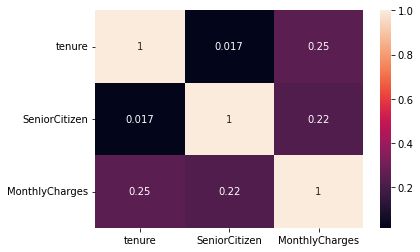

In [7]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### Standarization - Train, Test, Split 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5282, 3)
(1761, 3)
(5282, 1)
(1761, 1)


In [9]:
X_train_num = X_train[['tenure','MonthlyCharges']]

transformer = StandardScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)

X_train_norm = pd.DataFrame(X_train_normalized, columns = X_train_num.columns) 
X_train_norm

,tenure,MonthlyCharges
0,-0.340191,-0.514314
1,0.883210,0.017840
2,-1.196572,-0.819594
3,1.168670,-1.483535
4,-0.829552,0.658427
...,...,...
5277,-0.707212,1.292341
5278,-0.911112,0.880297
5279,1.046330,-1.466853
5280,-1.278132,0.167978


##### OneHotEncoder for categorical data X_train

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

In [12]:
X_train_cat = X_train[['SeniorCitizen']].reset_index(drop=True)
X_train_cat

#NO NEED TO APPLY THIS BECAUSE 'SENIORCITIZEN' IS ALREADY ENCODED AS 0 AND 1
# encoder = OneHotEncoder(drop='first').fit(X_train_cat) 
# encoded = encoder.transform(X_train_cat).toarray()
# encoded_columns = OneHotEncoder(drop='first').fit(X_train_cat).get_feature_names_out(input_features=X_train_cat.columns) 

#X_train_cat_norm = pd.DataFrame(encoded, columns = encoded_columns)
# X_train_cat_norm

,SeniorCitizen
0,0
1,1
2,0
3,0
4,0
...,...
5277,0
5278,0
5279,0
5280,1


######  Concatenate numerical and categorical data of X_train for training and testing.

In [13]:
X_train_transformed = pd.concat([X_train_norm, X_train_cat], axis=1)
X_train_transformed

,tenure,MonthlyCharges,SeniorCitizen
0,-0.340191,-0.514314,0
1,0.883210,0.017840,1
2,-1.196572,-0.819594,0
3,1.168670,-1.483535,0
4,-0.829552,0.658427,0
...,...,...,...
5277,-0.707212,1.292341,0
5278,-0.911112,0.880297,0
5279,1.046330,-1.466853,0
5280,-1.278132,0.167978,1


##### Transform X_test numerical & categorical value

In [14]:
#Standard Scaler X_test

# X_test_num = X_test.select_dtypes(include = np.number)
# X_test_num

# transformer = StandardScaler().fit(X_test_num)
# X_test_normalized = transformer.transform(X_test_num)

# X_test_norm = pd.DataFrame(X_test_normalized, columns = X_test_num.columns) 
# X_test_norm

X_test_num = X_test[['tenure','MonthlyCharges']]

transformer = StandardScaler().fit(X_test_num)
X_test_normalized = transformer.transform(X_test_num)

X_test_norm = pd.DataFrame(X_test_normalized, columns = X_test_num.columns) 
X_test_norm

,tenure,MonthlyCharges
0,-0.545642,-0.220199
1,1.116633,1.698898
2,-0.788902,0.231643
3,-1.275422,-1.460712
4,0.913916,0.422238
...,...,...
1756,1.562609,0.604618
1757,-0.829445,-1.493573
1758,0.630113,-1.475499
1759,1.562609,0.721276


In [17]:
#categorical X_test

X_test_categorical = X_test[['SeniorCitizen']].reset_index(drop=True)
X_test_categorical

# encoder = OneHotEncoder(drop='first').fit(X_test_categorical) 
# encoded = encoder.transform(X_test_categorical).toarray()
# encoded_columns = OneHotEncoder(drop='first').fit(X_test_categorical).get_feature_names_out(input_features=X_test_categorical.columns) 


# X_test_cat = pd.DataFrame(encoded, columns = encoded_columns)
# X_test_cat

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0
...,...
1756,0
1757,0
1758,0
1759,0


In [ ]:
#Concatenate X_test

In [18]:
X_test_transformed = pd.concat([X_test_norm, X_test_categorical], axis=1)
X_test_transformed

,tenure,MonthlyCharges,SeniorCitizen
0,-0.545642,-0.220199,0
1,1.116633,1.698898,0
2,-0.788902,0.231643,0
3,-1.275422,-1.460712,0
4,0.913916,0.422238,0
...,...,...,...
1756,1.562609,0.604618,0
1757,-0.829445,-1.493573,0
1758,0.630113,-1.475499,0
1759,1.562609,0.721276,0


In [19]:
#RESET. USED FOR DATA IMBALANCE.
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True) 

In [20]:
y_train.head()

,Churn
0,0
1,0
2,1
3,0
4,1


#### Linear relation on logit 

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_transformed, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [23]:
LR.predict_proba(X_train_transformed)

array([[0.83044869, 0.16955131],
       [0.88998276, 0.11001724],
       [0.66547579, 0.33452421],
       ...,
       [0.98793954, 0.01206046],
       [0.25968851, 0.74031149],
       [0.79622692, 0.20377308]])

In [24]:
logits = np.log(1/LR.predict_proba(X_train_transformed)[:,1]-1)

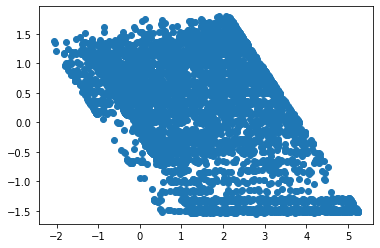

In [28]:
plt.scatter(logits,X_train_transformed['MonthlyCharges'])

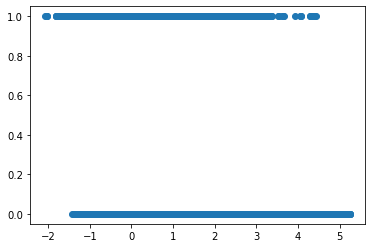

In [29]:
plt.scatter(logits,X_train_transformed['SeniorCitizen'])

#### Imbalance and metrics

<AxesSubplot:>

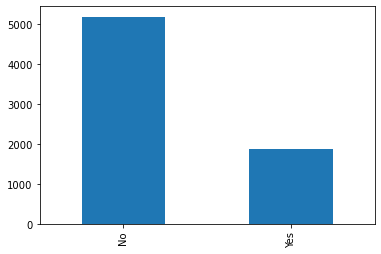

In [30]:
count_classes = customer['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [31]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_transformed, y_train)
LR.score(X_test_transformed, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7825099375354913

In [32]:
from sklearn.metrics import precision_score #HOW ACCURATE?
from sklearn.metrics import recall_score #NUMBER OF POSITIVE CASES THAT WE RECALL
from sklearn.metrics import f1_score #NUMBER BETWEEN PRECISION & RECALL

pred = LR.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


precision:  0.6169590643274854
recall:  0.4557235421166307
f1:  0.524223602484472


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1167,  131],
       [ 252,  211]], dtype=int64)

### Smote

In [34]:
!pip install imblearn
!pip install scikit-learn==1.1.0
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)

In [38]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4804630969609262
recall:  0.7170626349892009
f1:  0.5753899480069324


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
confusion_matrix(y_test,pred)

array([[939, 359],
       [131, 332]], dtype=int64)

In [ ]:
#I FINISHED EARLY!!!!!  AAAAAAAAAAAA!! (HAPPY DANCE)